# 加载数据

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [18]:
sample=0
color = ['r','g','b','k','y','m']
fmt = ['.r','.g','.b','.k','.y','.m']
labels = ['u','g','r','i','z','y']

In [3]:
data_file = np.load("/home/yltang/data/work_1/data/test_unlabel_data.npz")
data = data_file["data"]
label_file = np.load("/home/yltang/data/work_1/data/test_unlabel_label.npz")
label = label_file["data"]

In [4]:
label.shape, data.shape

((22388, 9), (22388, 90, 6))

## 方法实验

In [5]:
# 在打乱的数据中找到指定标签的数据
def find_index(target_label, label):
    index_list = []
    for i in range(len(label)):
        if np.argmax(label[i,:])==target_label:
            index_list.append(i)
    return index_list

In [6]:
#定义一个将数据打乱的函数
def data_shuffle(data, label):
    index = list(range(len(data)))
    np.random.shuffle(index)
    shuffle_data = np.zeros(shape=data.shape)
    shuffle_label = np.zeros(shape=label.shape)

    for i, j in enumerate(index):
        shuffle_data[i,:,:] = data[j,:,:]
        shuffle_label[i, :] = label[j, :]
        
    return shuffle_data, shuffle_label

In [7]:
sample += 1

[0. 0. 0. 0. 0. 0. 1. 0. 0.]


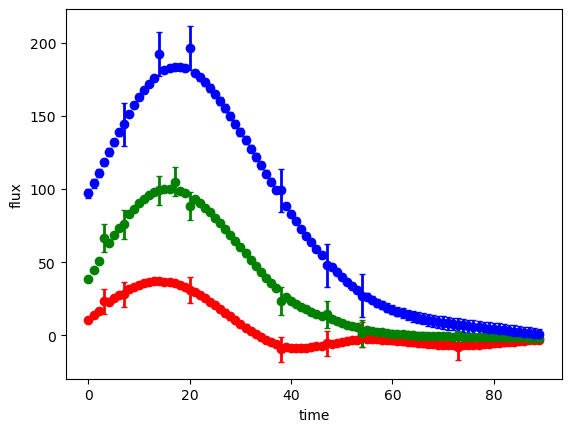

In [8]:
for i in range(3):
    mjd_ = np.linspace(0,89, 90)
    flux_ = data[sample, :, i]
    flux_err_ = data[sample, :, i+3]
    #print(flux_err_)
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt[i], elinewidth=2, capsize=2)
    plt.xlabel("time")
    plt.ylabel("flux")

print(label[sample])

[0. 0. 0. 0. 0. 0. 1. 0. 0.]


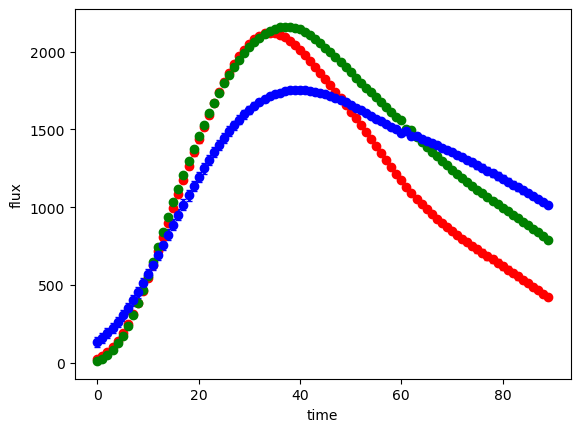

In [10]:
for i in range(3):
    mjd_ = np.linspace(0,89, 90)
    flux_ = shuffle_data[sample, :, i]
    flux_err_ = shuffle_data[sample, :, i+3]
    #print(flux_err_)
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt[i], elinewidth=2, capsize=2)
    plt.xlabel("time")
    plt.ylabel("flux")

print(label[sample])

In [11]:
data.shape, shuffle_data.shape, label.shape, shuffle_label.shape

((22811, 90, 6), (22811, 90, 6), (22811, 9), (22811, 9))

In [12]:
label[0], shuffle_label[0]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0.]))

In [13]:
#通过从数组中抽取一定数量的数据，重复多次来实现交叉验证
def test_data_generation(data, label):
    data_list = []
    label_list = []
    #每次抽取的样本数量
    sample_size = 1000

    #每次抽样前先打乱数据
    shuffle_data, shuffle_label = data_shuffle(data=data, label=label)
    
    #每个类别抽取sample_size数量的样本
    for i in range(9):
        target_index = find_index(target_label=i, label=shuffle_label)
        target_data = np.zeros(shape=(sample_size, shuffle_data.shape[1], shuffle_data.shape[2]))
        target_label = np.zeros(shape=(sample_size, shuffle_label.shape[1]))
        
        for j in range(sample_size):
            target_data[j,:,:] = shuffle_data[target_index[j], :, :]
            target_label[j,:] = shuffle_label[target_index[j], :]

        #讲每一个类别的源放到数据列表中，后期再concate一下的到最后要使用的数据
        data_list.append(target_data)
        label_list.append(target_label)

    return data_list, label_list

In [14]:
sampling_data, sampling_label = test_data_generation(data=data, label=label)

In [16]:
len(sampling_data), len(sampling_label)

(9, 9)

In [17]:
sampling_data[0].shape, sampling_label[0].shape

((1000, 90, 6), (1000, 9))

In [44]:
sample += 1

[0. 0. 0. 0. 0. 1. 0. 0. 0.]


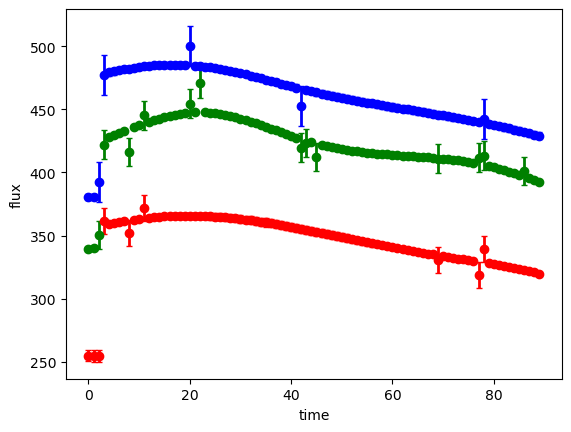

In [45]:
for i in range(3):
    mjd_ = np.linspace(0,89, 90)
    flux_ = sampling_data[0][sample, :, i]
    flux_err_ = sampling_data[0][sample, :, i+3]
    #print(flux_err_)
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt[i], elinewidth=2, capsize=2)
    plt.xlabel("time")
    plt.ylabel("flux")

print(label[sample])

## 打包成方法后的测试

In [5]:
import sys
sys.path.append("/home/yltang/data/work_1")

In [6]:
from cross_validation import Cross_Validation

In [7]:
cross_validation = Cross_Validation(data=data, label=label)

In [8]:
sampling_data, sampling_label = cross_validation.test_data_generation()

In [9]:
len(sampling_data), len(sampling_label)

(9, 9)

In [10]:
sampling_data[0].shape, sampling_label[0].shape

((1000, 90, 6), (1000, 9))

[0. 1. 0. 0. 0. 0. 0. 0. 0.]


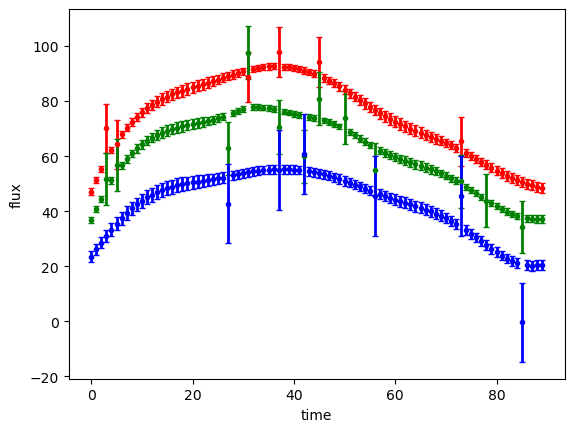

In [26]:
sample += 1
for i in range(3):
    mjd_ = np.linspace(0,89, 90)
    flux_ = sampling_data[8][sample, :, i]
    flux_err_ = sampling_data[8][sample, :, i+3]
    #print(flux_err_)
    plt.errorbar(x=mjd_, y=flux_, yerr=flux_err_, fmt=fmt[i], elinewidth=2, capsize=2)
    plt.xlabel("time")
    plt.ylabel("flux")

print(label[sample])